# pyfeyn2

## Rendering Feynman diagrams

There already exist plenty of tools to draw feynman diagrams in various environments:

* LaTeX:
    * [tikz-feynman](https://github.com/JP-Ellis/tikz-feynman)
    * [feynMF](https://ctan.org/pkg/feynmf?lang=en)
* Mathematica:
    * [feynarts](https://feynarts.de/)
    * [feynarts](https://feynarts.de/)
* C++: [feyndiagram](http://www.feyndiagram.com/)
* Java: [JaxoDraw](https://jaxodraw.sourceforge.io/)
* Python:
    * [qgraf-xml-drawer](https://github.com/ndeutschmann/qgraf-xml-drawer)
    * [feynman](https://github.com/GkAntonius/feynman)
    * [pyfeyn](https://pyfeyn.hepforge.org/)
* ...

## Why python?

* Easy to use and maintain
* Rich ecosystem (scikit-hep)
* Easy to glue different tools together
* Free (compared to Mathematica)

## feynml

However most of them are not directly computer-readable.
The original [feynml](https://feynml.hepforge.org/) project aimed to change that, but has not received updates for some while.
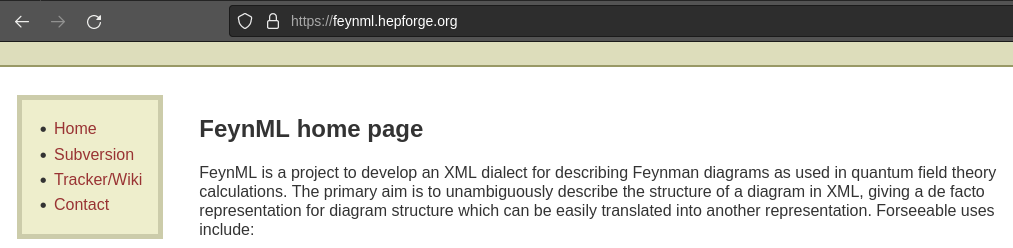

Such a standard, similar to LHE, is very reasonable for communicating Feynman diagrams (Computer/Person $\leftrightarrow$ Computer/Person).
The same topological Feynman diagram can be rendered in many different ways. 
That is why in the updated feynml, similarly to HTML+CSS, the physical/topological content is separated from the stylized representation. 

But let's first focus on pyfeyn and creating some diagrams.

## pyfeyn2 - What's new

* Different render engines:
    * PyX (original)
    * matplotlib
    * tikz
    * ASCII
    * Unicode
    * feynmp
    * DOT language
* Focus on modularity, enables interfaces to:
    * pyLHE
    * pyHEPMC
    * UFO (Universal FeynRules Object)
    * qgraf
    * form
    * ...

In [1]:
import pyfeyn2
from feynml import *

## Render a simple diagram

Basic diagram in the SM Drell-Yan $qq\to ee$.

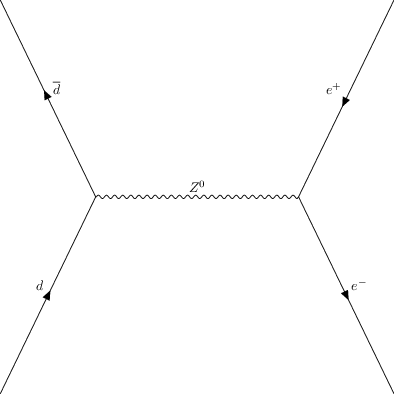

In [2]:

fd = FeynmanDiagram().add(
    v1 := Vertex(),
    v2 := Vertex(),
    Propagator(pdgid=23).connect(v1,v2),
    Leg(pdgid=1,target=v1,sense='incoming'),
    Leg(pdgid=-1,target=v1).with_incoming(),
    Leg(pdgid=11,sense='outgoing').with_target(v2),
    Leg(pdgid=-11).with_target(v2).with_outgoing(),
)
fd

In [3]:
print(fd)

FeynmanDiagram(id='FeynmanDiagram8', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Propagator11', pdgid=23, name='Z0', type='boson', particle=<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source='Vertex9', target='Vertex10')], vertices=[Vertex(id='Vertex9', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id='Vertex10', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id='Leg12', pdgid=1, name='d', type='fermion', particle=<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target='Vertex9', x=None, y=None, z=None, sense='incoming', external=None), Leg(id='Leg13', pdgid=-1, name='d~', type='anti ferm

In [1]:
# Place vertices
v1.with_xy(-0.5,0)
v2.with_xy(0.5,0)
# Position legs
from pyfeyn2.auto.position import  auto_align_legs, scale_positions
auto_align_legs(fd,incoming=[(-1,1),(-1,-1)],outgoing=[(1,1),(1,-1)])
# Render via TikZ
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
tfd = TikzFeynmanRender(fd)
tfd.render(show=True)
# make it bigger
fd2 = scale_positions(fd,2)
TikzFeynmanRender(fd2).render(show=True,file="test_DY.pdf");

NameError: name 'v1' is not defined

## LaTeX Output

For publication getting the underlying generated LaTeX code might be prefered.

In [5]:
print(tfd.get_src_diag())

\begin{tikzpicture}
\begin{feynman}
	\vertex (Vertex9) [] at (-0.5,0.0) ;
	\vertex (Vertex9clone) [] at (-0.5,0.0);
	\vertex (Vertex10) [] at (0.5,0.0) ;
	\vertex (Vertex10clone) [] at (0.5,0.0);
	\vertex (Leg12) [] at (-1,1);
	\vertex (Leg13) [] at (-1,-1);
	\vertex (Leg14) [] at (1,1);
	\vertex (Leg15) [] at (1,-1);
	\diagram*{
		(Vertex9) -- [photon] (Vertex10),
		(Leg12) -- [fermion] (Vertex9),
		(Leg13) -- [anti fermion] (Vertex9),
		(Vertex10) -- [fermion] (Leg14),
		(Vertex10) -- [anti fermion] (Leg15),
	};
\end{feynman}
\end{tikzpicture}



(cloned vertices here are a workaround for 4-point vertex tadpoles)

In [6]:
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\begin{feynman}
	\vertex (Vertex9) [] at (-0.5,0.0) ;
	\vertex (Vertex9clone) [] at (-0.5,0.0);
	\vertex (Vertex10) [] at (0.5,0.0) ;
	\vertex (Vertex10clone) [] at (0.5,0.0);
	\vertex (Leg12) [] at (-1,1);
	\vertex (Leg13) [] at (-1,-1);
	\vertex (Leg14) [] at (1,1);
	\vertex (Leg15) [] at (1,-1);
	\diagram*{
		(Vertex9) -- [photon] (Vertex10),
		(Leg12) -- [fermion] (Vertex9),
		(Leg13) -- [anti fermion] (Vertex9),
		(Vertex10) -- [fermion] (Leg14),
		(Vertex10) -- [anti fermion] (Leg15),
	};
\end{feynman}
\end{tikzpicture}
%
\end{document}


## Render palette

tikz:


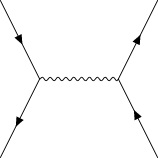

pyx:


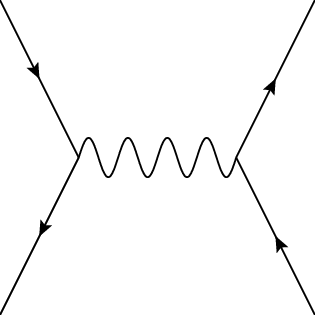

feynmp:


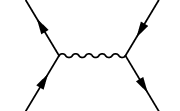

feynman:


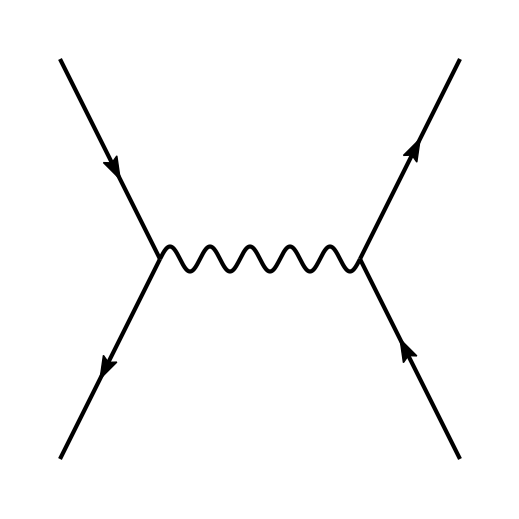

dot:


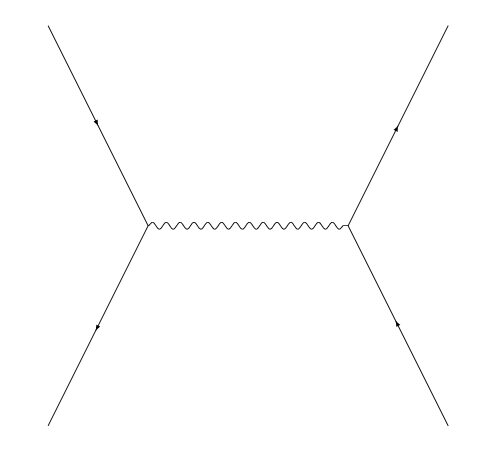

asciipdf:


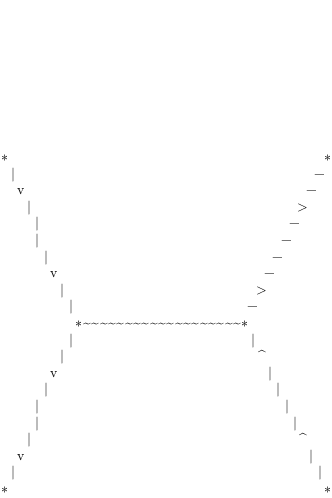

unicodepdf:


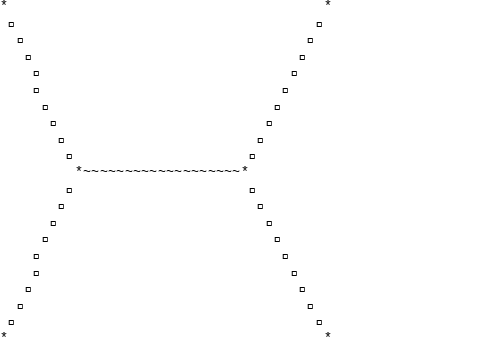

In [7]:
from pyfeyn2.render.all import AllRender
AllRender(fd).render()

## ASCII Output

Allows to graphically comment code that contains feynmandiagrams, instead of soley cryptic names like "qqb_eeb_box_qAAe"

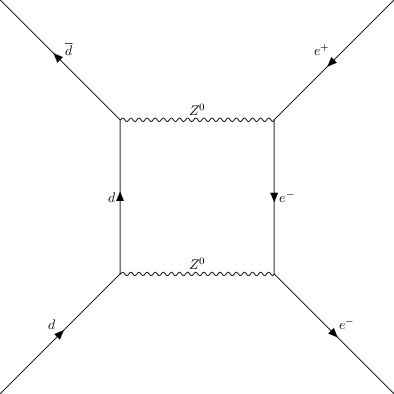

In [8]:
fd = FeynmanDiagram().add(
    v1 := Vertex(),
    v2 := Vertex(),
    v3 := Vertex(),
    v4 := Vertex(),
    Propagator(pdgid=23).connect(v1,v2),
    Propagator(pdgid=1).connect(v1,v4),
    Propagator(pdgid=23).connect(v4,v3),
    Propagator(pdgid=11).connect(v3,v2),
    Leg(pdgid=1,target=v1.id).with_incoming(),
    Leg(pdgid=-1,target=v4.id).with_incoming(),
    Leg(pdgid=11,target=v2.id).with_outgoing(),
    Leg(pdgid=-11,target=v3.id).with_outgoing(),
)

fd

In [9]:
from pyfeyn2.render.text.ascii import ASCIIRender
from pyfeyn2.auto.position import feynman_adjust_points
from pyfeyn2.auto.label import auto_label
auto_align_legs(fd,incoming=[(-2,2),(-2,-2)],outgoing=[(2,2),(2,-2)])
fd= feynman_adjust_points(fd,size=10,clear_vertices=True)
auto_label([*fd.propagators, *fd.legs])
#TikzFeynmanRender(fd).render(show=True)
s = ASCIIRender(fd).render(show=False,height=30,width=80)
print(s)

                                                                                
                                                                                
                                                                                
           d                                                                    
*->                                                                          --*
   ---->-                                                     e-         --->   
         --->-                                                       -->-       
              --->--                    Z0                       ->--           
                    -->--                                    >---               
                         -->---                          ----                   
                               ->*~~~~~~~~~~~~~~~~~~~~*->                       
                                 |                    |                         
                            

## Vertex positioning

Fully automized placement of the vertices is a complicated problem. Often spring models are used, but they need to be minimized numerically and won't necessarily preserve the symmetry of a diagram.

DOT language has node positioning formats [dot](https://graphviz.org/docs/layouts/dot/), [neato](https://graphviz.org/docs/layouts/neato/) and more.
However we can also use our own spring/vdW model and minimize it using [iminuit](https://iminuit.readthedocs.io/en/stable/).

Let's look at a more complicated diagram:


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	
404


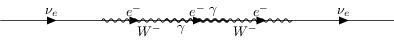

In [10]:
from xsdata.formats.dataclass.parsers import XmlParser
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style
qgraf.install("3.6.5")
xml_string = qgraf.run("nu_e[p1]", "nu_e[p1]",loops=3,loop_momentum="l",model = model.gws_UnitaryGauge_reduced, style=style)
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

print(len(fml.diagrams))


fd = fml.diagrams[3]
fd

In [11]:
import numpy as np
# default rendering changes
def gen_fd(leg:bool = True):
    fd = fml.diagrams[3].deepcopy()
    # remove all unpositioned vertices
    if leg:
        auto_align_legs(fd,
           incoming=[(0, 0)],
           outgoing=[(10, 0) ],
        )
    auto_label([*fd.propagators, *fd.legs])
    return fd

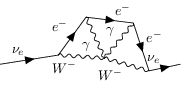

In [12]:
from pyfeyn2.auto.position import auto_align_legs,auto_grid
fd = gen_fd(False)
auto_align_legs(fd,
           incoming=[(-2, 0)],
           outgoing=[(2, 0) ],
        )
fd = feynman_adjust_points(fd) # DOT neato algorithm
#fd = auto_grid(fd, n_x=5,n_y=2) # grid it # toggle
TikzFeynmanRender(fd).render();

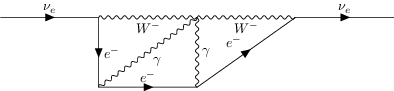

In [13]:
from pyfeyn2.auto.position import auto_vdw,auto_grid
fd = gen_fd()
fd = auto_vdw(fd,points = [v for v in fd.vertices if v.x is None or v.y is None],intersection=10.0,x_symmetry=10.0,y_symmetry=1.0)
fd = auto_grid(fd, n_x=5,n_y=2) # toggle
TikzFeynmanRender(fd).render();

In [14]:
fd.vertices

[Vertex(id='Vert1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=2.5, y=0.3020781299982208, z=None, label=None, shape=None),
 Vertex(id='Vert2', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=7.5, y=0.3020781299982208, z=None, label=None, shape=None),
 Vertex(id='Vert3', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=2.5, y=-1.4711590496510167, z=None, label=None, shape=None),
 Vertex(id='Vert4', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=5.0, y=-1.4711590496510167, z=None, label=None, shape=None),
 Vertex(id='Vert5', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=5.0, y=0.3020781299982208, z=None, label=None, shape=None)]

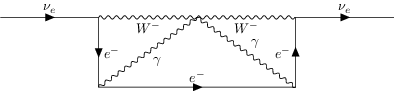

In [15]:
fd.vertices[3].with_x(max(map(lambda v : v.x, fd.vertices)))
TikzFeynmanRender(fd).render();

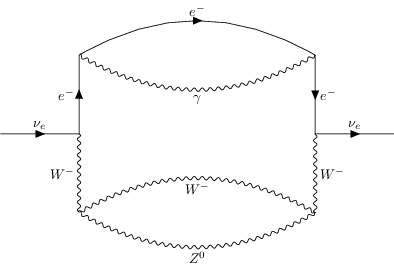

In [16]:
from  pyfeyn2.auto.bend import auto_bend
fd = fml.diagrams[53].deepcopy()
auto_align_legs(fd,incoming=[(-5, 0) ], outgoing=[(5, 0) ],)
fd = auto_vdw(fd,points = [v for v in fd.vertices if v.x is None or v.y is None],intersection=10.0,x_symmetry=10.0,y_symmetry=10.0)
auto_label([*fd.propagators, *fd.legs])
fd = auto_bend(fd) # toggle
fd = auto_grid(fd, n_x=2,n_y=4, min_y=-2,max_y=2,min_x=-3,max_x=3) # toggle
auto_align_legs(fd, incoming=[(-5, 0) ], outgoing=[(5,0) ]) # toggle
# Fix vertex pos
for l in fd.legs: fd.get_vertex(l.target).with_y(0)
TikzFeynmanRender(fd).render();

## XML ouput

xsdata package in python makes it easy to convert a object from python to a XML representation and vice-versa.
Complete specification: [feynml doc](https://pyfeyn2.readthedocs.io/en/stable/feynml/index.html)

In [17]:
fd = FeynmanDiagram().add(
    v1 := Vertex(),
    v2 := Vertex(),
    Propagator(pdgid=23).connect(v1,v2),
    Leg(pdgid=1,target=v1,sense='incoming'),
    Leg(pdgid=-1,target=v1).with_incoming(),
    Leg(pdgid=11,sense='outgoing').with_target(v2),
    Leg(pdgid=-11).with_target(v2).with_outgoing(),
)
#fd # toggle

In [18]:
fml = FeynML(
    head=Head(
        metas=[Meta(name="pyfeyn2", content="test")],
    ),
    diagrams=[fd],
)
print(fml.to_xml())

<?xml version="1.0" encoding="UTF-8"?>
<feynml version="0.2.17">
  <head>
    <meta name="pyfeyn2" content="test"/>
    <meta name="feynml" content="0.2.17"/>
    <style/>
  </head>
  <diagram id="FeynmanDiagram29" style="" sheet="">
    <propagator id="Propagator32" pdgid="23" type="boson" style="">
      <name>Z0</name>
      <source>Vertex30</source>
      <target>Vertex31</target>
    </propagator>
    <vertex id="Vertex30" style=""/>
    <vertex id="Vertex31" style=""/>
    <leg id="Leg33" pdgid="1" type="fermion" style="">
      <name>d</name>
      <target>Vertex30</target>
      <sense>incoming</sense>
    </leg>
    <leg id="Leg34" pdgid="-1" type="anti fermion" style="">
      <name>d~</name>
      <target>Vertex30</target>
      <sense>incoming</sense>
    </leg>
    <leg id="Leg35" pdgid="11" type="fermion" style="">
      <name>e-</name>
      <target>Vertex31</target>
      <sense>outgoing</sense>
    </leg>
    <leg id="Leg36" pdgid="-11" type="anti fermion" style="">
  

## CSS customization

Allows many different tweaks, but is optional. If two rules overlap the more specific rule takes precedence, as with HTML/CSS.

In [19]:
v1 = Vertex("v1").with_xy(-1, 0).with_shape("blob") # shape is a predefined set of definitions incl. symbol
v2 = Vertex("v2").with_xy(1, 0).with_style("symbol : dot") # symbol defines what gets rendered on the vertex

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(name="g").connect(v1, v2),
    Leg(name="g").with_target(v1).with_xy(-2, 1).with_incoming(),
    Leg(name="g").with_target(v1).with_xy(-2, -1).with_incoming().with_class("notred"),
    Leg(name="g", clazz="red").with_target(v2).with_xy(2, 1).with_outgoing(),
    Leg("myid1",name="g").with_target(v2).with_xy(2, -1).with_outgoing()
)

In [20]:
fd = fd.with_rule("""
* {
    bend-direction: left;
    color: green;
}
""")
fd.add_rules("""
.red {
    color: red;
}
.notred {
    color: blue;
}
#myid1 {
    color: gray;
}
[pdgid="21"] {
    color: black;
}
#myid2 {
    color: gray;
}
""");

In [21]:
print(fd.to_xml())

<?xml version="1.0" encoding="UTF-8"?>
<diagram id="FeynmanDiagram37" style="" sheet="* {&#10;    bend-direction: left;&#10;    color: green&#10;    }&#10;.red {&#10;    color: red&#10;    }&#10;.notred {&#10;    color: blue&#10;    }&#10;#myid1 {&#10;    color: gray&#10;    }&#10;[pdgid=&quot;21&quot;] {&#10;    color: black&#10;    }&#10;#myid2 {&#10;    color: gray&#10;    }">
  <propagator id="Propagator38" pdgid="21" type="gluon" style="">
    <name>g</name>
    <source>v1</source>
    <target>v2</target>
  </propagator>
  <vertex id="v1" style="" x="-1.0" y="0.0" shape="blob"/>
  <vertex id="v2" style="symbol: dot" x="1.0" y="0.0"/>
  <leg id="Leg39" pdgid="21" type="gluon" style="" x="-2.0" y="1.0">
    <name>g</name>
    <target>v1</target>
    <sense>incoming</sense>
  </leg>
  <leg id="Leg40" pdgid="21" type="gluon" style="" class="notred" x="-2.0" y="-1.0">
    <name>g</name>
    <target>v1</target>
    <sense>incoming</sense>
  </leg>
  <leg id="Leg41" pdgid="21" type="gluo

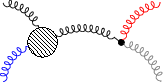

In [22]:
TikzFeynmanRender(fd).render();

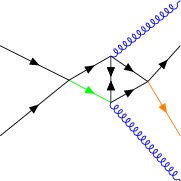

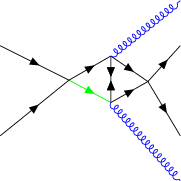

In [23]:
fd = FeynmanDiagram()
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("majorana")
p4 = Propagator("p4").connect(v3, v4).with_type("gluon")
p5 = Propagator("p5").connect(v2, v4).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2).with_class("blue")
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, -1)

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])
fd= feynman_adjust_points(fd)

fd2 = fd.deepcopy()

l6.style.color = "orange"


fml = FeynML(
    head=Head(
        metas=[Meta(name="pyfeyn2", content="test")],
    ),
    diagrams=[fd,fd2],
)

fml.with_rules(
    """ * {color: red;}
        [type=fermion] {color: blue; line: gluon}
        #p1 {color: green;}
        #p3 {line: majorana;}
        :not([type=fermion]) { color : black; line: fermion}""")

for f in fml.diagrams:
    TikzFeynmanRender(f).render();